In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
import joblib

In [5]:
current_dir = os.getcwd()
data_path = os.path.join(os.path.dirname(current_dir), 'data', 'stroke_data.csv')

df = pd.read_csv(data_path)

In [6]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (5110, 12)

Missing Values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Basic Statistics:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi  

Text(0, 0.5, 'Count')

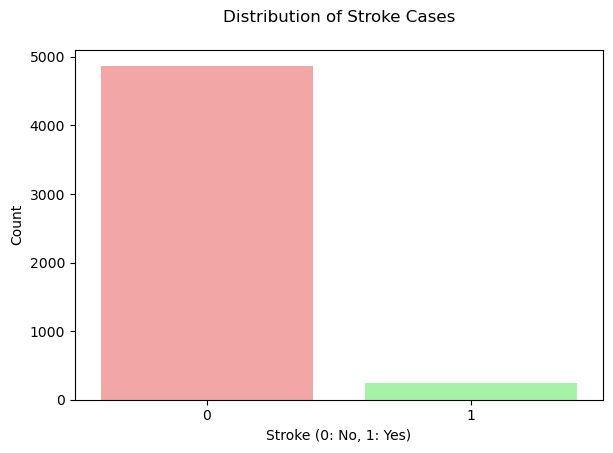

In [8]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='stroke', palette=['#ff9999', '#99ff99'])
plt.title('Distribution of Stroke Cases', pad=20, fontsize=12)
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Count')

Text(0, 0.5, 'Age')

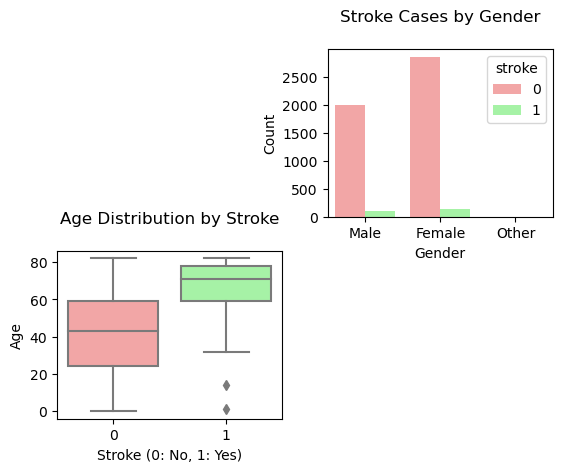

In [9]:
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='gender', hue='stroke', palette=['#ff9999', '#99ff99'])
plt.title('Stroke Cases by Gender', pad=20, fontsize=12)
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(2, 2, 3) 
sns.boxplot(data=df, x='stroke', y='age', palette=['#ff9999', '#99ff99'])
plt.title('Age Distribution by Stroke', pad=20, fontsize=12)
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Age')

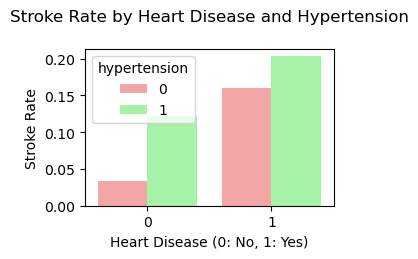

In [10]:
plt.subplot(2, 2, 4)
health_data = df.groupby(['heart_disease', 'hypertension'])['stroke'].mean().reset_index()
sns.barplot(data=health_data, x='heart_disease', y='stroke', hue='hypertension', palette=['#ff9999', '#99ff99'])
plt.title('Stroke Rate by Heart Disease and Hypertension', pad=20, fontsize=12)
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Stroke Rate')
plt.tight_layout(pad=2.0)
plt.show()

In [11]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [12]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [13]:
df_encoded['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '80+'])
df_encoded['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, float('inf')], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df_encoded['health_risk'] = df['hypertension'] + df['heart_disease']


In [14]:
X = df_encoded.drop(['stroke', 'id', 'age_group', 'bmi_category'], axis=1)
y = df_encoded['stroke']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)


Model Performance:
-----------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



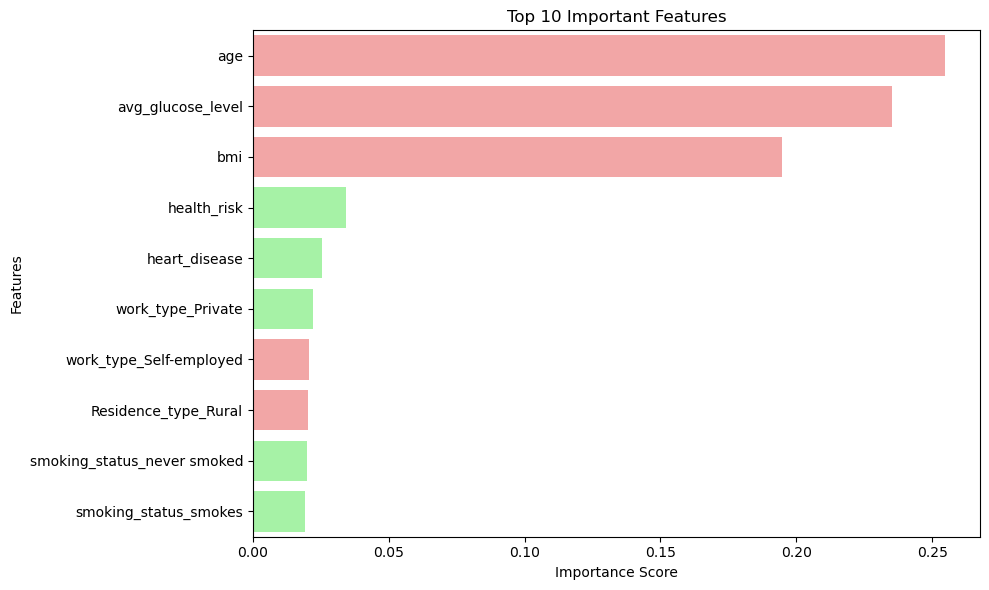

['../models/stroke_model.joblib']

In [20]:
y_pred = model.predict(X_test)
print("\nModel Performance:")
print("-----------------")
print(classification_report(y_test, y_pred))

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature', palette=['#ff9999', '#ff9999', '#ff9999', '#99ff99', '#99ff99', '#99ff99', '#ff9999', '#ff9999', '#99ff99', '#99ff99'])
plt.title('Top 10 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

os.makedirs('../models', exist_ok=True)
joblib.dump(model, '../models/stroke_model.joblib')


In [38]:
def predict_stroke_risk(patient_data):

    complete_patient_data = {
        'age': patient_data['age'],
        'hypertension': patient_data['hypertension'],
        'heart_disease': patient_data['heart_disease'],
        'avg_glucose_level': patient_data['avg_glucose_level'],
        'bmi': patient_data['bmi'],
        'gender_Female': 0,
        'gender_Male': 0,
        'gender_Other': 0,
        'ever_married_No': 0,
        'ever_married_Yes': 0,
        'work_type_Govt_job': 0,
        'work_type_Never_worked': 0,
        'work_type_Private': 0,
        'work_type_Self-employed': 0,
        'work_type_children': 0,
        'Residence_type_Rural': 0,
        'Residence_type_Urban': 0,
        'smoking_status_Unknown': 0,
        'smoking_status_formerly smoked': 0,
        'smoking_status_never smoked': 0,
        'smoking_status_smokes': 0,
        'health_risk': patient_data['hypertension'] + patient_data['heart_disease']
    }
    
     
    if 'gender' in patient_data:
        complete_patient_data[f"gender_{patient_data['gender']}"] = 1
    if 'ever_married' in patient_data:
        complete_patient_data[f"ever_married_{patient_data['ever_married']}"] = 1
    if 'work_type' in patient_data:
        complete_patient_data[f"work_type_{patient_data['work_type']}"] = 1
    if 'Residence_type' in patient_data:
        complete_patient_data[f"Residence_type_{patient_data['Residence_type']}"] = 1
    if 'smoking_status' in patient_data:
        complete_patient_data[f"smoking_status_{patient_data['smoking_status']}"] = 1

    patient_df = pd.DataFrame([complete_patient_data])
    probability = model.predict_proba(patient_df)[0][1]
    return probability


new_patient = {
    'age': 60,
    'hypertension': 1,
    'heart_disease': 0,
    'avg_glucose_level': 150,
    'bmi': 28,
    'gender': 'Male',
    'ever_married': 'Yes',
    'work_type': 'Private',
    'Residence_type': 'Urban',
    'smoking_status': 'formerly smoked'
}

risk = predict_stroke_risk(new_patient)
print(f"stroke risk: {risk*100:.2f}%")

stroke risk: 10.39%
